Sklearn

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn import preprocessing
import process_csv_data
import betting
import numpy as np
import csv
import os
import struct

In [2]:
def slice_the_set(df,start,end):

    start = int(len(df)*start/100)
    end = int(len(df)*end/100)

    return df.iloc[start:end]

In [3]:
df = pd.read_csv('../data/sliding05_shots_and_possession_extra.csv')
df

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,...,away-opposition_shots_on_target,away-opposition_possession,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,0,H,3.50,3.30,2.10,1,3,6,11,16,...,30,428,0.489051,0.164179,0.452991,0.301887,0.484472,0.192308,0.416667,0.200000
1,1,H,3.25,3.25,2.30,5,2,3,19,12,...,58,362,0.470899,0.213483,0.521739,0.333333,0.562130,0.200000,0.513274,0.137931
2,2,H,1.20,6.00,19.00,7,2,1,15,8,...,71,486,0.447205,0.208333,0.418919,0.258065,0.469697,0.145161,0.510791,0.253521
3,3,A,2.38,3.30,3.00,3,3,4,9,11,...,64,500,0.460784,0.191489,0.578947,0.142857,0.465517,0.166667,0.488550,0.250000
4,4,A,2.60,3.25,2.80,4,1,5,15,16,...,76,473,0.504000,0.238095,0.477124,0.219178,0.495146,0.254902,0.550725,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,6991,H,5.00,3.80,1.70,4,2,4,10,12,...,65,521,0.537500,0.232558,0.512821,0.200000,0.487395,0.172414,0.580357,0.323077
6992,6992,H,2.00,3.60,3.70,3,2,5,9,21,...,26,490,0.528090,0.191489,0.500000,0.456522,0.528846,0.127273,0.412698,0.807692
6993,6993,H,1.80,3.75,4.50,3,3,4,8,8,...,56,414,0.483607,0.135593,0.543478,0.160000,0.511905,0.348837,0.474576,0.160714
6994,6994,H,1.33,5.25,9.00,2,3,5,12,14,...,54,472,0.500000,0.193548,0.505051,0.280000,0.514563,0.207547,0.442623,0.314815


In [4]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])

df_train = slice_the_set(df,0,80)
df_test = slice_the_set(df,80,100)

df_train

,Unnamed: 0,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,...,away-opposition_shots_on_target,away-opposition_possession,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,0,2,3.50,3.30,2.10,1,3,6,11,16,...,30,428,0.489051,0.164179,0.452991,0.301887,0.484472,0.192308,0.416667,0.200000
1,1,2,3.25,3.25,2.30,5,2,3,19,12,...,58,362,0.470899,0.213483,0.521739,0.333333,0.562130,0.200000,0.513274,0.137931
2,2,2,1.20,6.00,19.00,7,2,1,15,8,...,71,486,0.447205,0.208333,0.418919,0.258065,0.469697,0.145161,0.510791,0.253521
3,3,0,2.38,3.30,3.00,3,3,4,9,11,...,64,500,0.460784,0.191489,0.578947,0.142857,0.465517,0.166667,0.488550,0.250000
4,4,0,2.60,3.25,2.80,4,1,5,15,16,...,76,473,0.504000,0.238095,0.477124,0.219178,0.495146,0.254902,0.550725,0.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,5591,0,2.75,3.20,2.70,3,3,4,15,16,...,65,404,0.567010,0.272727,0.443299,0.372093,0.524590,0.156250,0.537190,0.107692
5592,5592,2,1.30,5.75,8.00,7,2,1,27,11,...,48,437,0.574850,0.281250,0.553398,0.192982,0.443396,0.361702,0.533333,0.291667
5593,5593,1,2.55,3.40,2.63,0,5,5,10,28,...,67,474,0.579545,0.196078,0.459016,0.500000,0.468750,0.266667,0.452703,0.208955
5594,5594,1,2.30,3.40,3.00,7,1,2,19,9,...,50,405,0.468254,0.322034,0.559140,0.173077,0.519685,0.409091,0.555556,0.100000


In [5]:
y_train  = df_train['result']
X_train= df_train.iloc[:,2:-1]
y_test = df_test['result']
X_test = df_test.iloc[:,2:-1]

In [6]:
from scipy.special import softmax

In [7]:
#100,1000,3 -> 49,2

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,80,3),
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

nn.out_activation_ = 'softmax'

In [8]:
import datetime as dt
start = dt.datetime.now()
nn.fit(X_train, y_train)
end = dt.datetime.now()

Iteration 1, loss = 1.19609189
Iteration 2, loss = 1.08410021
Iteration 3, loss = 1.06342875
Iteration 4, loss = 1.06110407
Iteration 5, loss = 1.06078240
Iteration 6, loss = 1.06071017
Iteration 7, loss = 1.06075544
Iteration 8, loss = 1.06072984
Iteration 9, loss = 1.06071154
Iteration 10, loss = 1.06065603
Iteration 11, loss = 1.06062682
Iteration 12, loss = 1.06057777
Iteration 13, loss = 1.06056056
Iteration 14, loss = 1.06054379
Iteration 15, loss = 1.06048323
Iteration 16, loss = 1.06058629
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [9]:
print('It took {} to train the neural network'.format(end-start))

It took 0:00:01.825529 to train the neural network


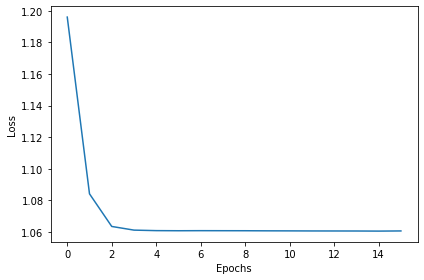

In [10]:
%matplotlib inline
loss_values = nn.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [11]:
y_test_pred = nn.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 44.79%
